# District Heating: An Investigation into the Efficiency of a Centralized Heating System
#### Thermodynamics, Final Project  |  Karen Hinh, Mads Young
District heating is a method of home climate control that should be more utilized in the future due to its energy efficiency and friendliness to more sustainable energy sources. For heat sources, there’s geothermal or water source heat pumps, as well as gas or electric boilers, but for the purposes of this project, we are going to focus on exploring the differences between water source heat pumps and gas / electric boilers.

In this project, we will investigate the efficiencies of a small scale district heating network with different heat sources (water source heat pumps and gas / electric boilers) and mediums of heat transfer (liquid water vs steam). If there’s extra time, we would be interested in exploring the efficiency difference between small scale district heating with decentralized heating in houses. 

To accomplish this, we will build a thermodynamic model of a small scale district heating network with variables such as the amount of heat put in, the initial and final (after heat extraction) temperature of the fluid and pressure differences within the heat pump. We will use the model to compare energy cost, thermodynamic properties, and efficiency of the relevant heating methods to ideally prove the superiority of district heating networks over decentralized heating. This will be done in coolprop.

![](final_system_diagram.png)

In [160]:
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP
import numpy as np
import matplotlib.pyplot as plt

# Varied Mass Flow Rate (Heat Pump)
### Sources
- https://www.achrnews.com/articles/92875-the-essentials-of-working-with-r-410a#:~:text=A%20normally%20operating%20R%2D410A,side%20pressure%20of%20130%20psig.
- Source for mass flow rate, https://www.iosrjournals.org/iosr-jmce/papers/RDME-Volume4/RDME-34.pdf

In [297]:
# based off of heat pump cycle in textbook (assumed water outside is 10 C)

T1 = 2 + 273.15 # K
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K
T4 = T1

P1 = 896 * 1000 # Pa
P2 = 2882 * 1000 # Pa
P3 = 200 *1000 # Pa
P4 = 700 *1000 # Pa

m = np.array([32,44]) / 3600 # kg/s, normal range is 32-44 kg/hr

print('The mass flow rate ranges from: ' + str(round(m[0], 5)) + ' kg/s to ' + str(round(m[1], 5)) + ' kg/s.')

The mass flow rate ranges from: 0.00889 kg/s to 0.01222 kg/s.


In [298]:
substance = 'R410a'

# Enthalpy calculations
h1 = CP.PropsSI('H', 'T',T1, 'P',P1, substance) # vapor, J/kg
h2 = CP.PropsSI('H', 'T',T2, 'P',P2, substance) # vapor, J/kg
h3 = CP.PropsSI('H', 'T',T3, 'P',P3, substance) # liquid, J/kg
h4 = 213.2942 * 1000 # vapor-liquid, J/kg

print('The enthalpy at state 1-4 are: \n' 
      + str(round(h1,2)) + ' J/kg, \n' + str(round(h2,2)) + ' J/kg, \n' 
      + str(round(h3,2)) + ' J/kg, \n' + str(round(h4,2)) + ' J/kg. ')

The enthalpy at state 1-4 are: 
203047.25 J/kg, 
426390.53 J/kg, 
462422.68 J/kg, 
213294.2 J/kg. 


## Q56 (Qc), Q23 (Qh) and W12 (Win)

In [299]:
Q41 = m * (h1 - h4) # W
Q23 = m * (h2 - h3) # W
W12 = m * (h1 - h2) # W
COP = Q23 / W12 # Qh/Win

print('Qc is: ' + str(round(Q41[0],2)) + ' W to ' + str(round(Q41[1],2)) + ' W')
print('Qh is: ' + str(round(Q23[0],2)) + ' W to ' + str(round(Q23[1],2)) + ' W')
print('Win is: ' + str(round(W12[0],2)) + ' W to ' + str(round(W12[1],2)) + ' W')
print('COP is: ' + str(round(COP[0],2)))

Qc is: -91.08 W to -125.24 W
Qh is: -320.29 W to -440.39 W
Win is: -1985.27 W to -2729.75 W
COP is: 0.16


## Heat Exchanger
Sources:
- https://www.engineeringtoolbox.com/arithmetic-logarithmic-mean-temperature-d_436.html
- https://www.engineeringtoolbox.com/overall-heat-transfer-coefficient-d_434.html
- https://www.engineeringtoolbox.com/heat-transfer-coefficients-exchangers-d_450.html
- https://www.pdhonline.com/courses/m371/m371content.pdf

In [303]:
m_water = 0.03 # kg/s
c_water = 4168 # J/kg-C, https://www.bbc.co.uk/bitesize/guides/z2gjtv4/revision/5

dT_water = -Q23/(m_water*c_water) # C/s

print('The change in temp of the water loop is: ' + str(round(dT_water[0],5)) + ' K to ' + str(round(dT_water[1],5)) + ' K.')

The change in temp of the water loop is: 2.56147 K to 3.52202 K.


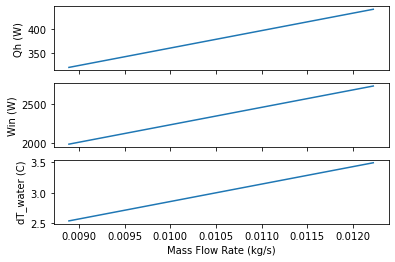

In [302]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(m,-Q23)
ax2.plot(m,-W12)
ax3.plot(m,dT_water)
ax1.set_ylabel('Qh (W)')
ax2.set_ylabel('Win (W)')
ax3.set_ylabel('dT_water (C)')
ax3.set_xlabel('Mass Flow Rate (kg/s)')
plt.show()

In [ ]:
# # Houses
# hot_temp = 50 # C
# cold_temp = 50 - dT_water

# h1_cold = 50 # C
# h2_cold = 40 # C
# h3_cold = 30 # C

# dT_h1 = hot_temp - h1_cold
# dT_h2 = hot_temp - h2_cold
# dT_h3 = hot_temp - h3_cold

# cold_temp_h = (dT_h1 + dT_h2 + dT_h3) / 3

# print(cold_temp, cold_temp_h, dT_h1, dT_h2, dT_h3)

In [312]:
# # Base Case
# hot_temp = 70 # C

# dT_h1 = -20 # C

# T1 = hot_temp + dT_h1

# r_pipe = 0.04 # m
# h_pipe = 20 # m --> modify length of pipes, add heat losses
# k = .005  # W/m*K heat loss coefficient
# soiltemp = 35 #C
# hl = h_pipe * k * (hot_temp+T1 - 2*soiltemp) #W, watts lost --> from a paper
# heatloss = hl / c_water # W / J/kg-C --> K/W, thermal resistance

# v_water = 3.1415 * r_pipe**2 * h_pipe # m3
# rho = 997 # kg/m3
# m = v_water * rho

# cold_temp = (T1) - heatloss # C

# cold_temp

# print(hot_temp, cold_temp)

## Varied Head Demand from Houses

In [220]:
# based off of heat pump cycle in textbook (assumed water outside is 10 C)

T1 = 2 + 273.15 # K
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K
T4 = T1

P1 = 896 * 1000 # Pa
P2 = 2882 * 1000 # Pa
P3 = 200 *1000 # Pa
P4 = 700 *1000 # Pa

m = np.array([10,100]) / 3600 # kg/s, normal range is 32-44 kg/hr

print('The mass flow rate ranges from: ' + str(round(m[0], 5)) + ' kg/s to ' + str(round(m[1], 5)) + ' kg/s.')

The mass flow rate ranges from: 0.00278 kg/s to 0.02778 kg/s.


In [221]:
Q41 = m * (h1 - h4) # W
Q23 = m * (h2 - h3) # W
W12 = m * (h1 - h2) # W
COP = Q23 / W12 # Qh/Win

print('Qc is: ' + str(round(Q41[0],2)) + ' W to ' + str(round(Q41[1],2)) + ' W')
print('Qh is: ' + str(round(Q23[0],2)) + ' W to ' + str(round(Q23[1],2)) + ' W')
print('Win is: ' + str(round(W12[0],2)) + ' W to ' + str(round(W12[1],2)) + ' W')
print('COP is: ' + str(round(COP[0],2)))

Qc is: -28.46 W to -284.64 W
Qh is: -100.09 W to -1000.89 W
Win is: -620.4 W to -6203.98 W
COP is: 0.16


In [222]:
h = 400 # W/m2-K, cooling of water by air --> compare to stainless steel / wall thickness (thermal conductivity)
A = 1 # m2, random assumption

LMT = Q23 / (h*A) # K, typical range: 1-10 K for LMT

print('The change in temp over time ranges from: ' + str(round(LMT[0],5)) + ' K to ' + str(round(LMT[1],5)) + ' K.')

The change in temp over time ranges from: -0.25022 K to -2.50223 K.


In [280]:
# Houses
# hot_temp = 70 # C

# Q = h*A*dT
# Q = m*c*dT

v_air = 10**3 # m3, volume of room
rho_air = 1.2041 # kg/m3
m_air = v_air * rho_air # kg
c_air = 1.012 * 1000 # J/kg-K
h = 800 # W/m2-K, cooling of water by air --> compare to stainless steel / wall thickness (thermal conductivity)
A = 0.25 # m2, random assumption

# Different houses
dT_house1 = np.array([1,5])/900 # C/s
Q_req1 = m_air*c_air*dT_house1 # W

dT_house2 = np.array([1,5])/900 # C/s
Q_req2 = m_air*c_air*dT_house2 # W

# Solve for dT
dT_1 = Q_req1 / (h*A) #  K/s

# dT_h1 = -39 # C
# dT_h2 = -39 # C
# dT_h3 = -39 # C

# T1 = hot_temp + dT_h1
# T2 = hot_temp + dT_h2
# T3 = hot_temp + dT_h3

# r_pipe = 0.04 # m
# h_pipe = 30 # m --> modify length of pipes, add heat losses

# v_water = 3.1415 * r_pipe**2 * h_pipe # m3
# rho = 997 # kg/m3
# m = v_water * rho

# cold_temp = (m*T1 + m*T2 + m*T3) / (3*m) # C

# cold_temp
dT

array([ 6.76971778, 33.84858889])